# 4.0-Level 1 annotation

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-10"

## Introduction

Level 1 annotation of main cell types

In [2]:
timepoint <- "T6"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(ggplot2)
library(dplyr)
}))

## Parameters

In [4]:
#dr_here(show_reason = TRUE)
source(here("SCGRES_105_106/sc_analysis/misc/paths.R"))
source(here("utils/bin.R"))

"{annot}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{annot}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [5]:
# read object
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.rds")))

# markers
rna.markers <- read_csv(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.csv")))

Rows: 22074 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


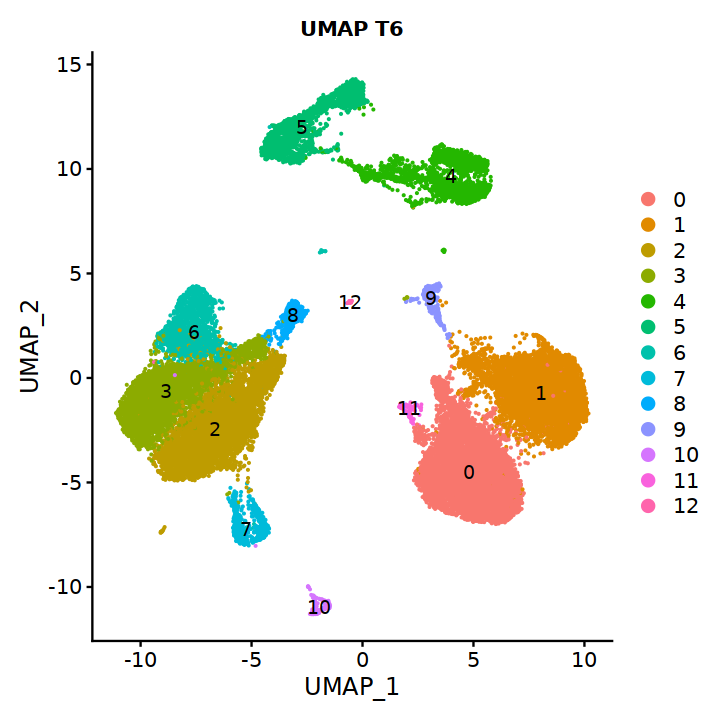

In [6]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label=T,
) + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

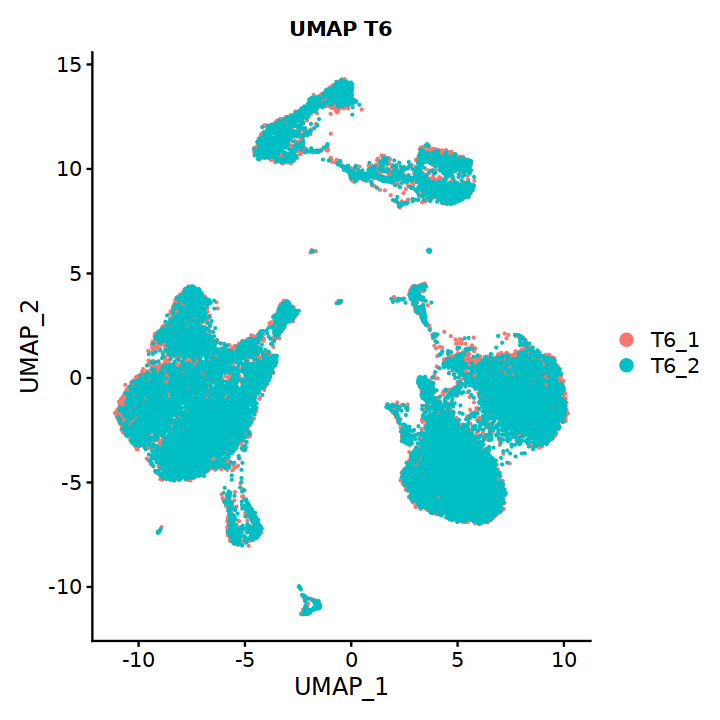

In [7]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  group.by = "sample_id",
  pt.size = 0.1,
) + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

### Check general cell types

Plot specific markers to annotate main cell types

#### T-cells

In [8]:
markers = c("CD3E", "CD3G","CD4","CD8A", "CD8B","ANXA1","GZMK","FOXP3")

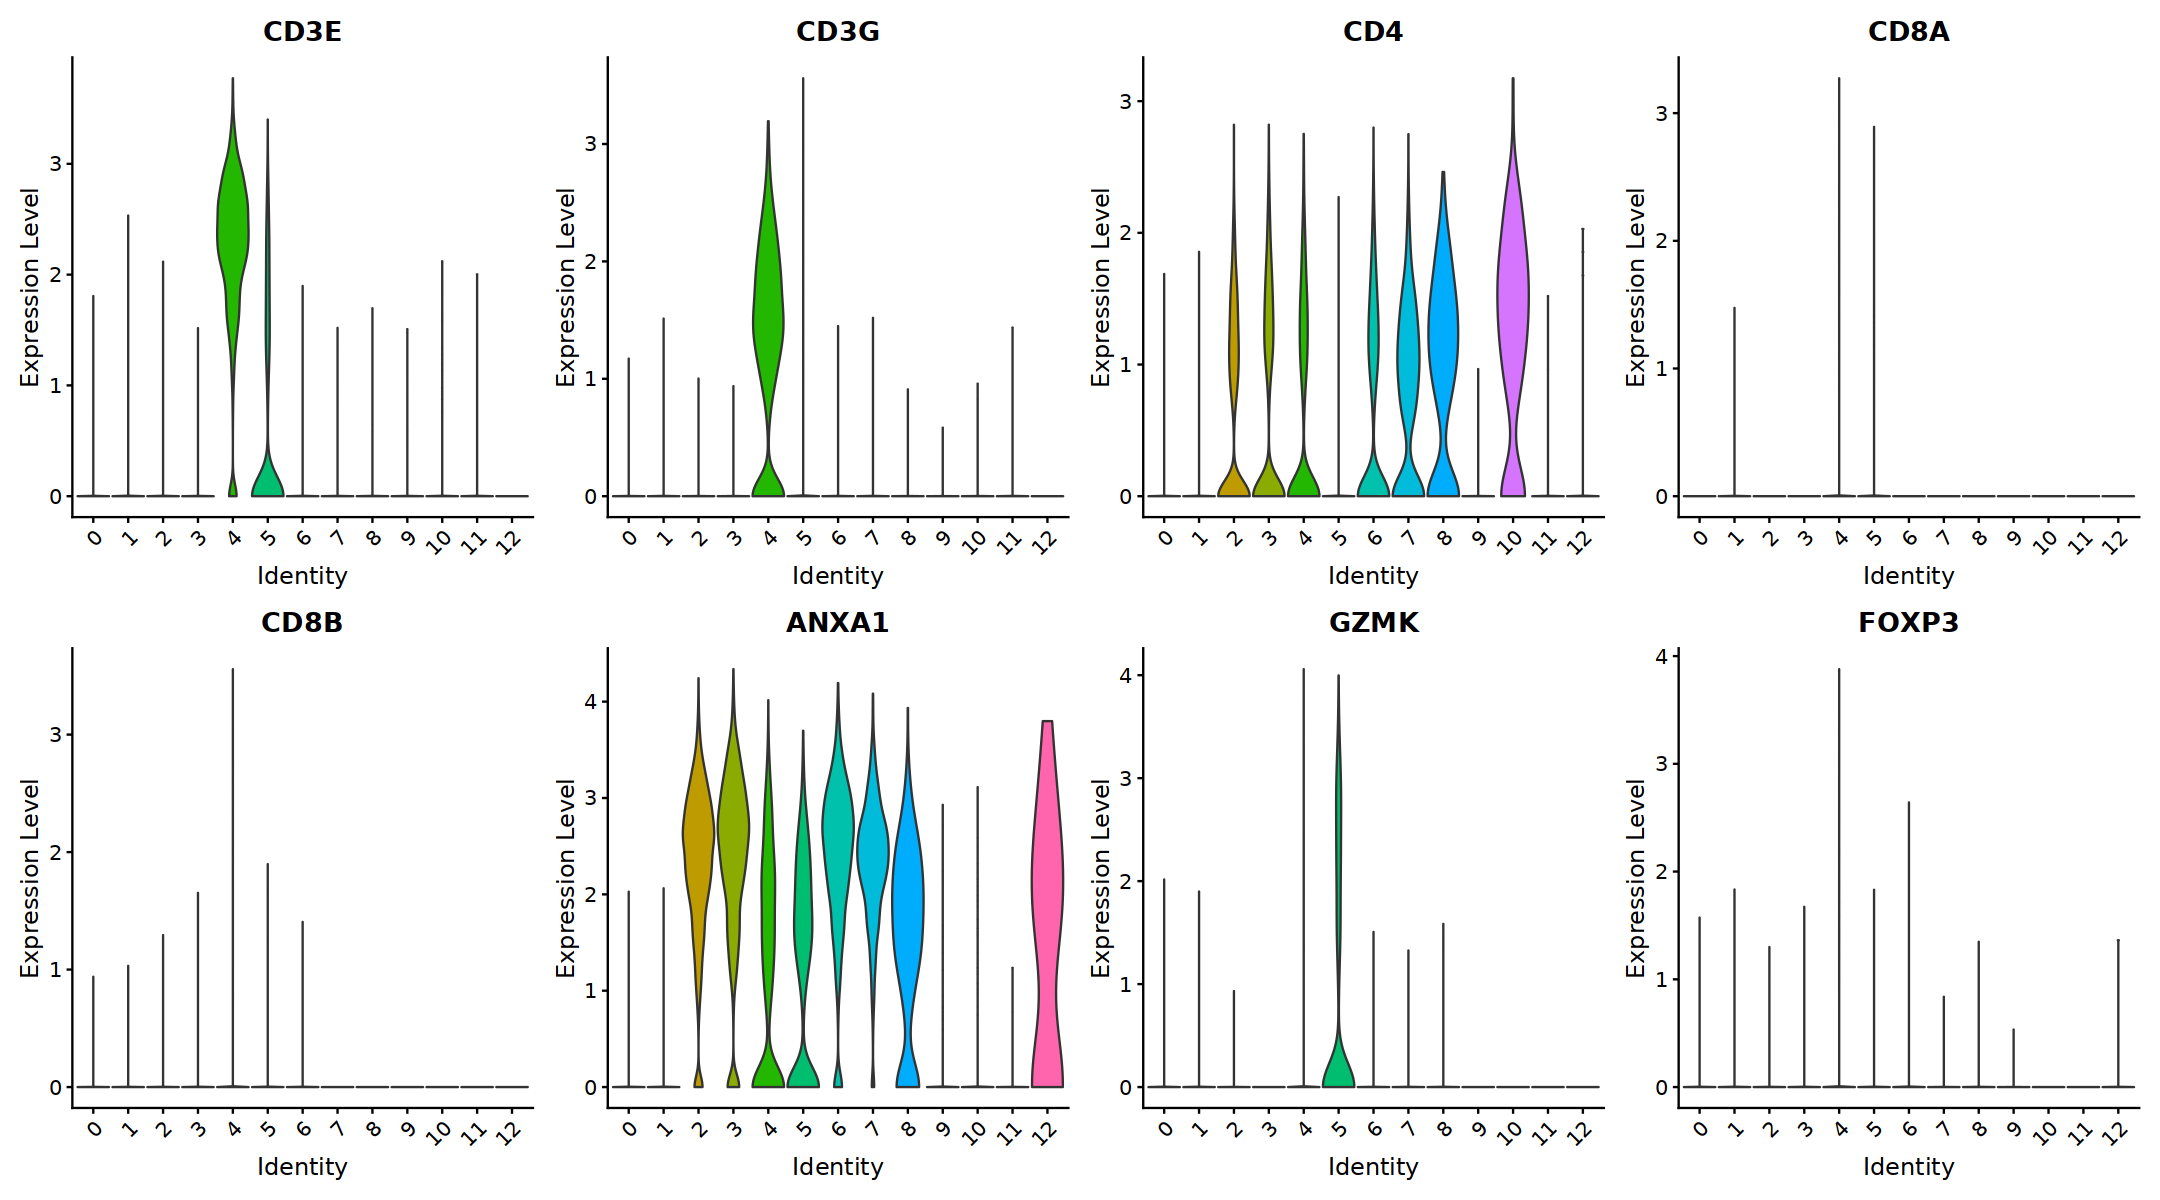

In [9]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, features=markers, ncol=4, pt.size = 0)

#### Natural Killers

In [10]:
markers = c("NCAM1", "FCGR3A", "CX3CR1", "GNLY", "KLRC2", "KLRD1", "KLRC3", "KLRK1", "KLRC1", "GNLY", "NKG7")

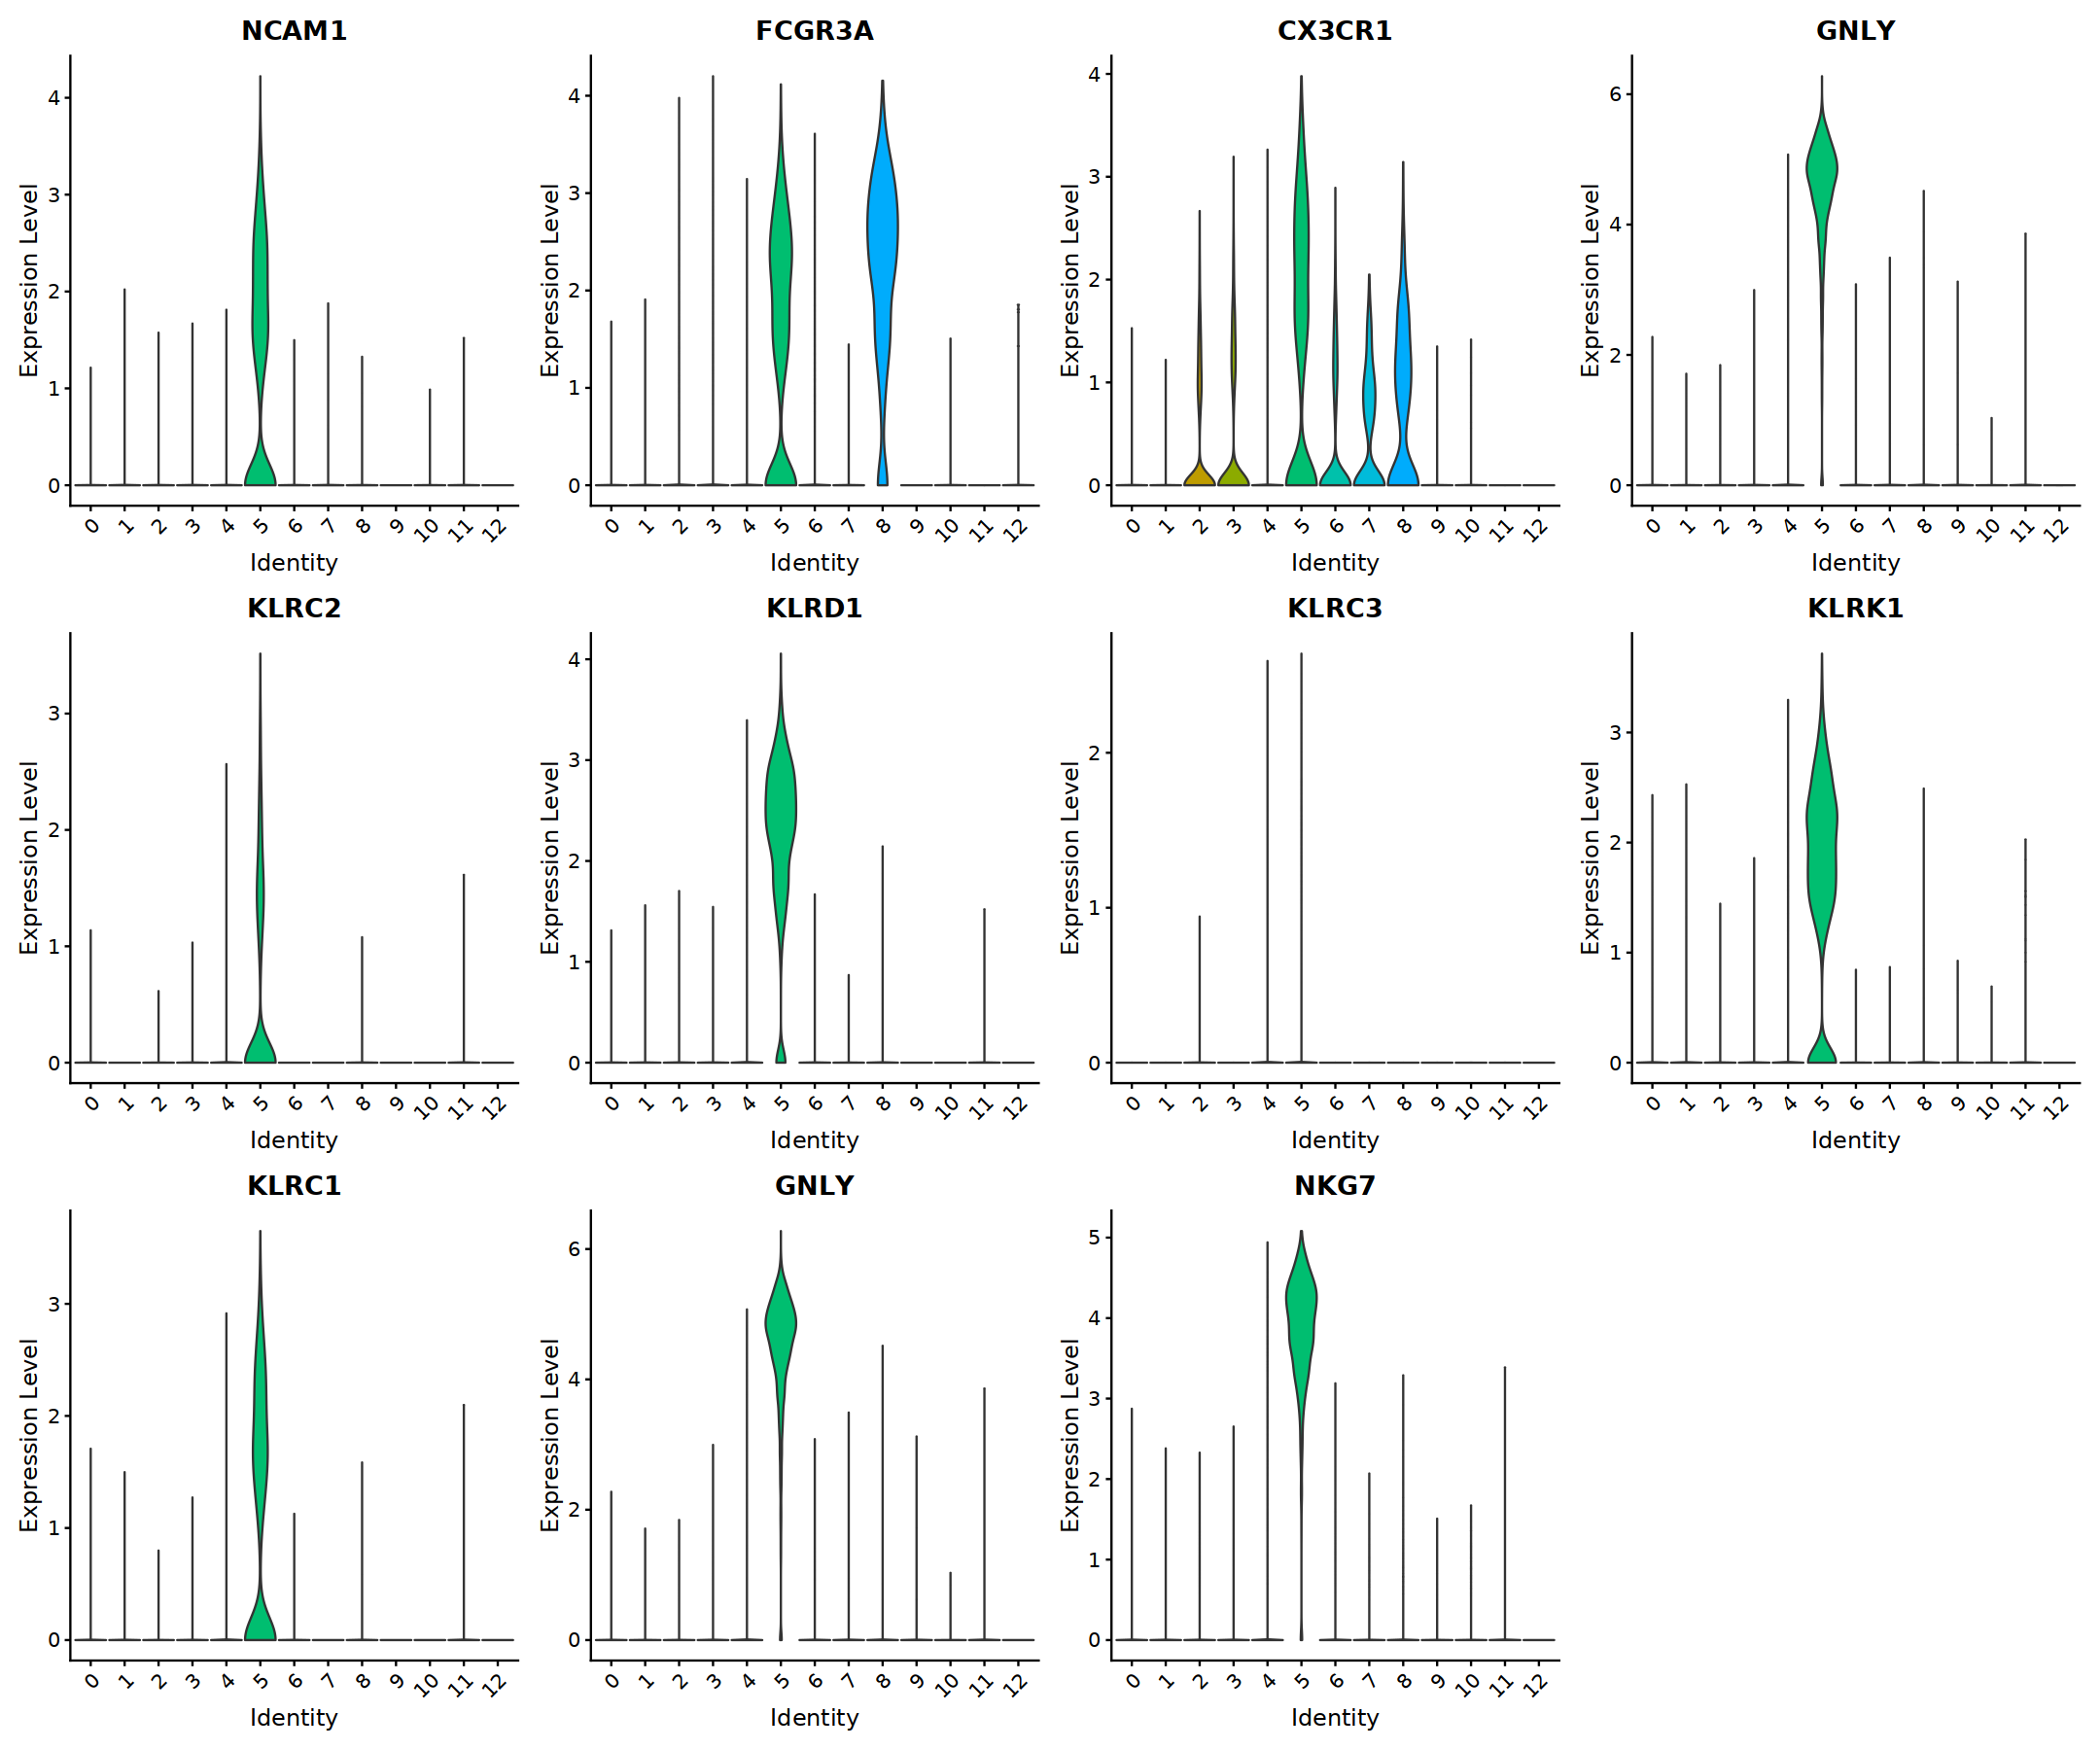

In [11]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, features=markers, ncol=4, pt.size = 0)

#### B-cells

In [12]:
markers = c("CD19","MS4A1","CCR7", "SELL","ITGAX", "CD79A","CD79B","JCHAIN","IGHA1")

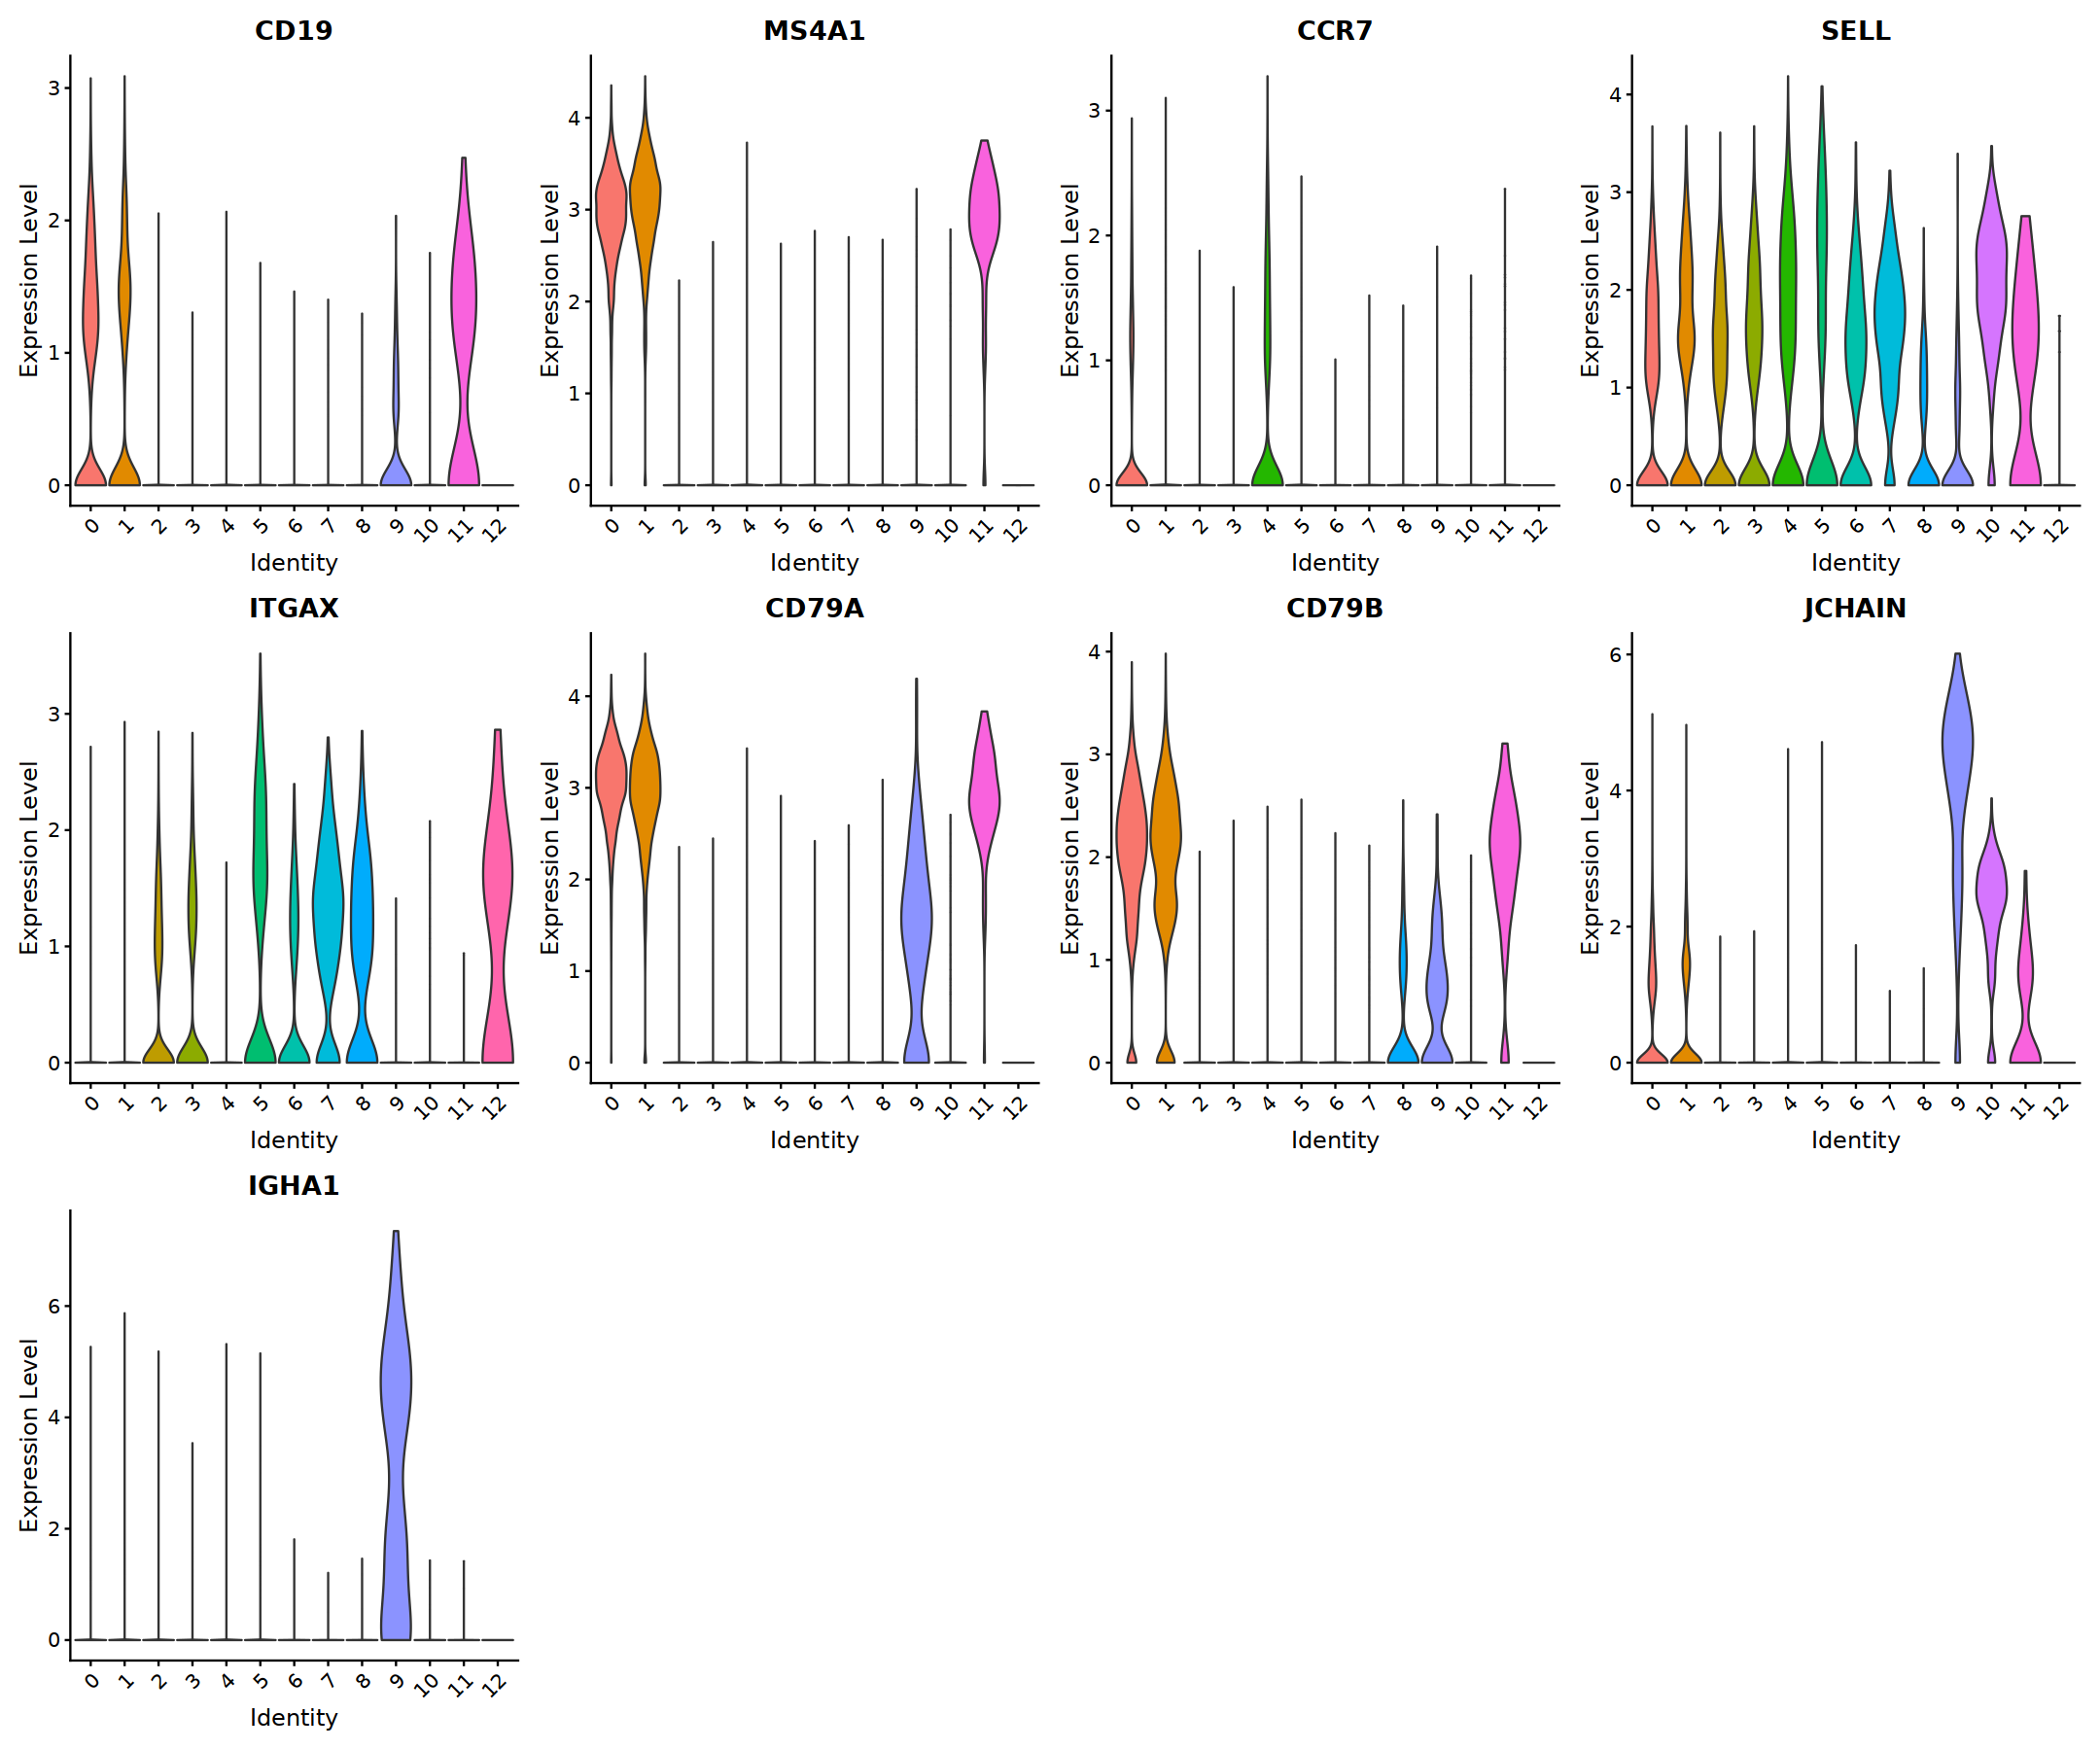

In [13]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, features=markers, ncol=4, pt.size = 0)

#### Monocytes 

In [14]:
markers = c("CD68","CD14", "S100A8", "S100A9", "LYZ", "VCAN", 
            "FCN1","FCGR3A", "CX3CR1", "HLA-DRB1", "HLA-DRA")

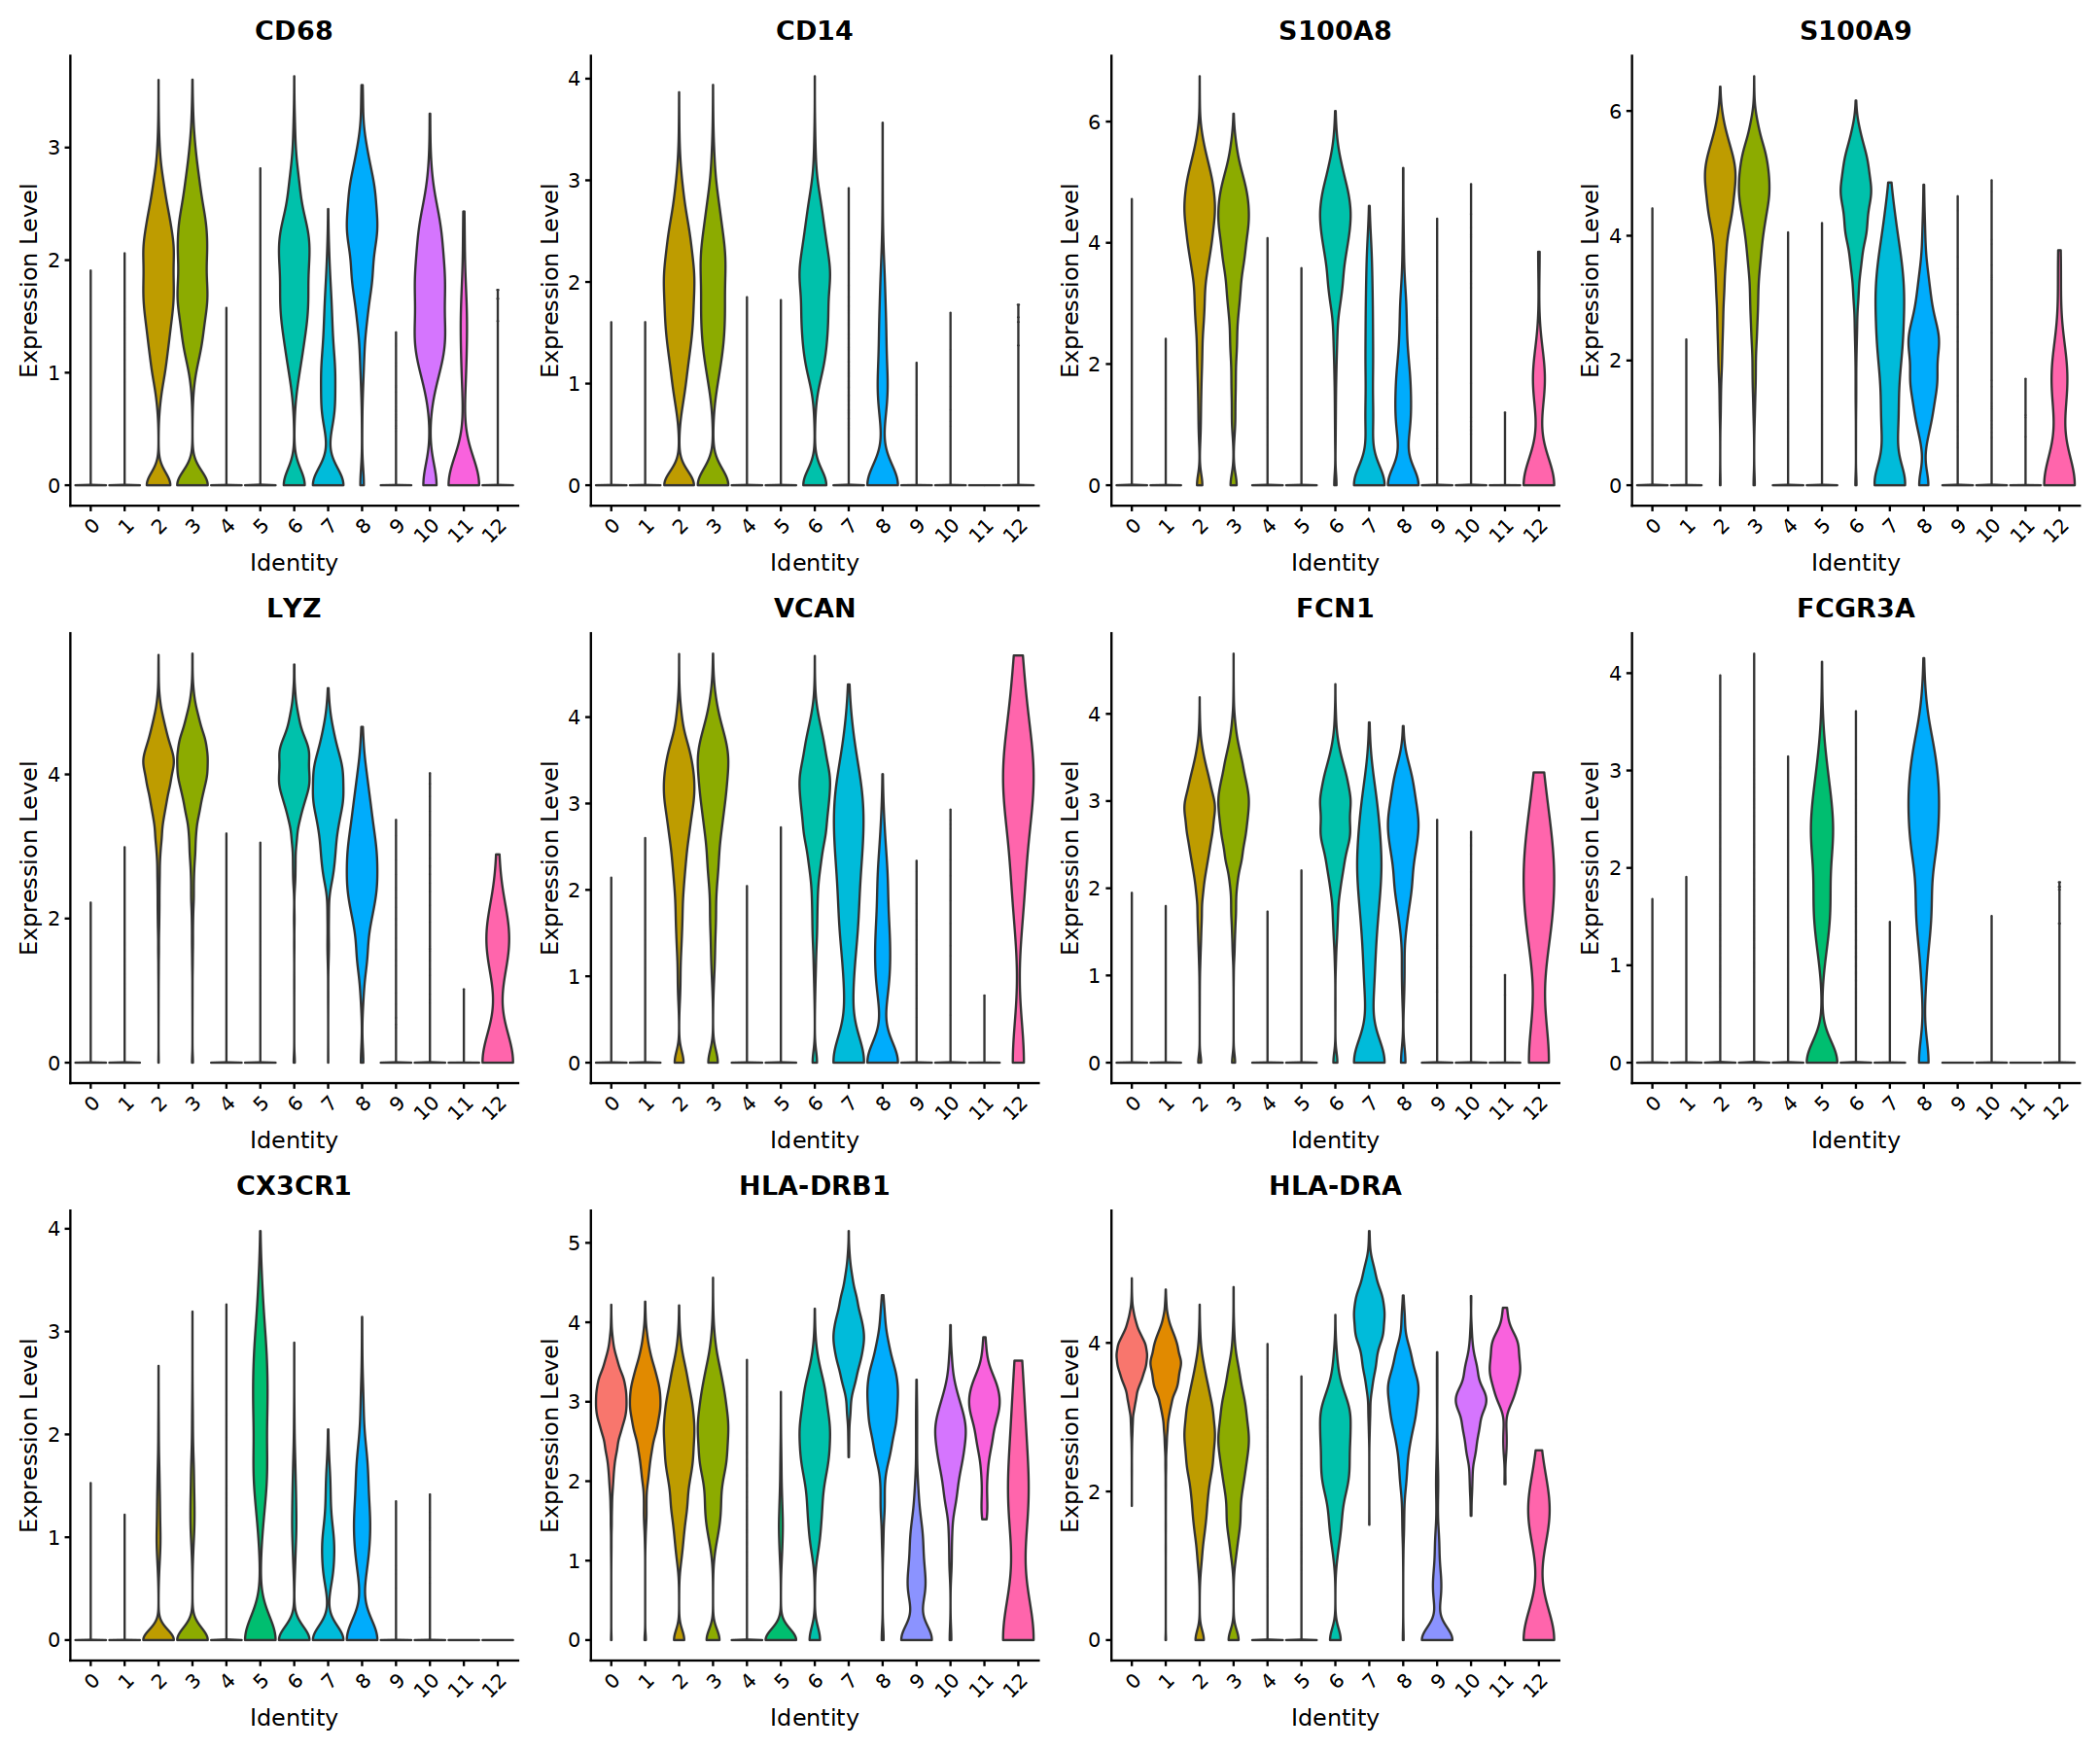

In [15]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, features=markers, ncol=4, pt.size = 0)

#### Dendritic cells

In [16]:
markers = c("CLEC9A", "XCR1", "IDO1","FCER1A", 
            "CLEC10A","ITGAX","SIGLEC6","IL3RA","JCHAIN")

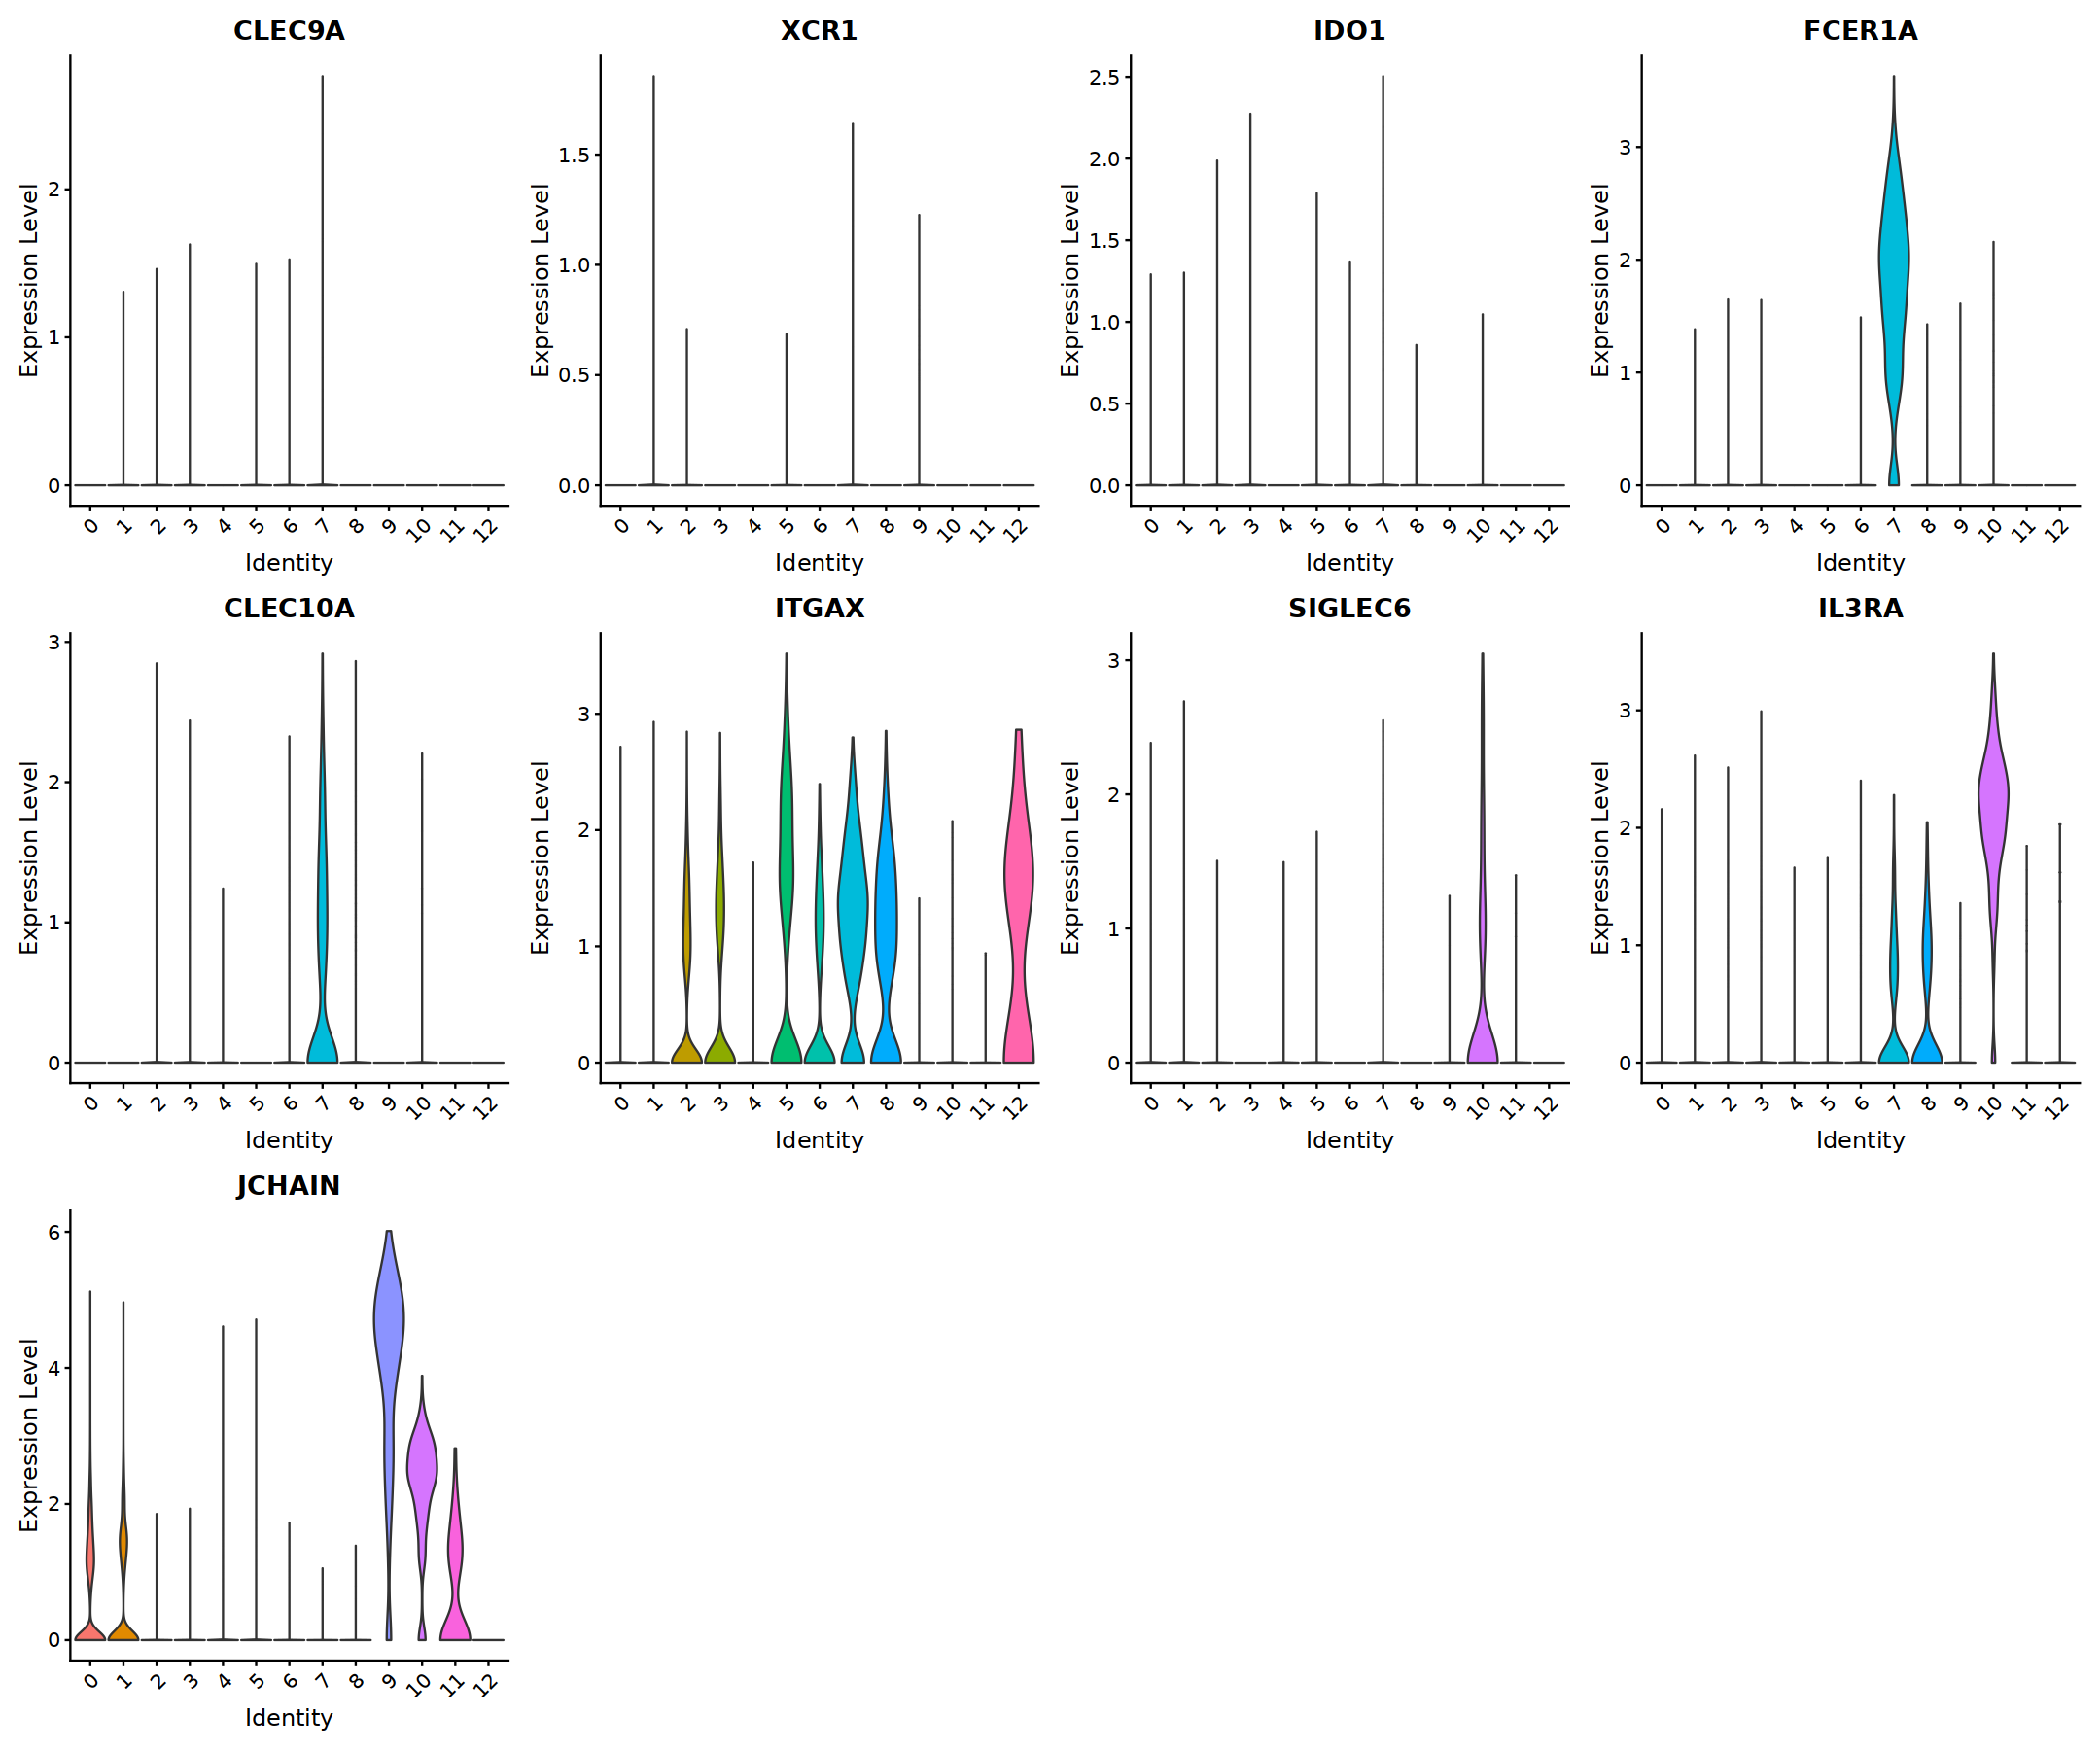

In [17]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, features=markers, ncol=4, pt.size = 0)

Platelets

In [18]:
c <- 9
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC)) %>% head()

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2.005227e-186,6.588624,0.788,0.029,6.109725e-182,9,IGHA1
1.068176e-170,5.584906,0.942,0.209,3.254625e-166,9,JCHAIN
8.605670e-84,5.320847,0.395,0.012,2.622062e-79,9,IGHG1
1.501741e-09,5.168315,0.129,0.036,4.575654e-05,9,IGHV3-21
2.371666e-73,5.021960,0.672,0.226,7.226228e-69,9,IGKC
8.333629e-32,4.982421,0.283,0.049,2.539173e-27,9,IGKV4-1


In [19]:
c <- 8
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=15)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9.658111e-289,3.858224,0.977,0.004,2.942730e-284,8,C1QB
2.054730e-244,2.842534,0.884,0.014,6.260558e-240,8,C1QA
3.805418e-215,2.763211,0.773,0.001,1.159473e-210,8,C1QC
9.957224e-173,2.579090,0.907,0.134,3.033867e-168,8,FCGR3A
7.977449e-161,2.153377,0.886,0.143,2.430649e-156,8,TCF7L2
2.308409e-154,2.045106,0.715,0.049,7.033491e-150,8,FMNL2
3.381918e-163,2.012572,0.937,0.194,1.030437e-158,8,CSF1R
1.767593e-137,1.975769,0.998,0.446,5.385679e-133,8,LST1
7.564907e-132,1.950162,0.900,0.250,2.304951e-127,8,MS4A7


## Renaming

In [20]:
rename_clusters= list("0"="B-cells", 
                      "1"="B-cells",
                      "2"="Monocytes", 
                      "3"="Monocytes",
                      "4"="T-cells",
                      "5"="NK",
                      "6"="MPA",
                      "7"="Dendritic cells",
                      "8"="Macrophages",
                      "9"="Plasma cells",
                      "10"="pDC",
                      "11"="LPA",
                      "12"="Monocytes")
seurat_obj <- RenameIdents(object = seurat_obj, rename_clusters)
seurat_obj$l1_annot <- Idents(seurat_obj)

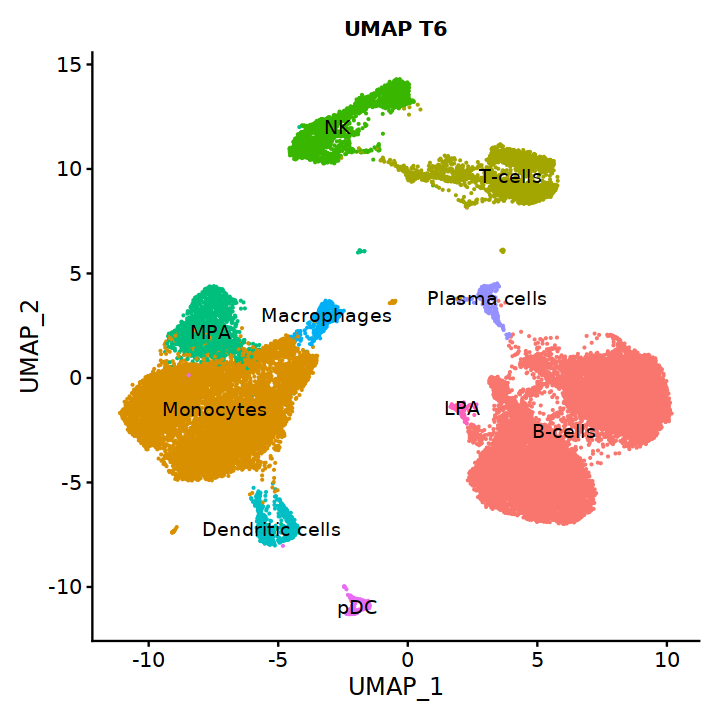

In [21]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label = T
) + NoLegend() + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## Save

In [22]:
saveRDS(seurat_obj, here::here(glue::glue("{annot}/{robj_dir}/4.0-l1_all_{timepoint}.rds")))

## Session Info

In [23]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3    forcats_1.0.0      stringr_1.5.0      dplyr_1.1.3       
 [5] purrr_1.0.2        readr_2.1.4        tidyr_1.3.0        tibble_3.2.1      
 [9] ggplot2_3.4.4      tidyverse_2.0.0    glue_1.6.2         here_1.0.1        
[13] SeuratObject_4.1.4 Seurat_4.0.5  